In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier

# Base learners
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of dataset:", X.shape)
print("Target classes:", data.target_names)
X.head()

Shape of dataset: (569, 30)
Target classes: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Check missing values
print("Missing values:\n", X.isnull().sum().sum())

# Standardize features (important for SVM/Logistic in stacking)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

Missing values:
 0


In [ ]:
# Base learner: Decision Tree
base_tree = DecisionTreeClassifier(random_state=42)

# Bagging with Decision Trees
bagging_model = BaggingClassifier(estimator=base_tree, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Predictions
y_pred_bag = bagging_model.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

Bagging Accuracy: 0.9415204678362573


In [ ]:
# AdaBoost
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

AdaBoost Accuracy: 0.9590643274853801
Gradient Boosting Accuracy: 0.9473684210526315


In [8]:
# Base models
base_learners = [
    ("dt", DecisionTreeClassifier(max_depth=3, random_state=42)),
    ("svm", SVC(probability=True, kernel="rbf", random_state=42)),
    ("lr", LogisticRegression(max_iter=1000, random_state=42))
]

# Meta model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5
)
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))

Stacking Accuracy: 0.9766081871345029



Bagging Performance:
Accuracy: 0.9415204678362573
              precision    recall  f1-score   support

   malignant       0.94      0.91      0.92        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



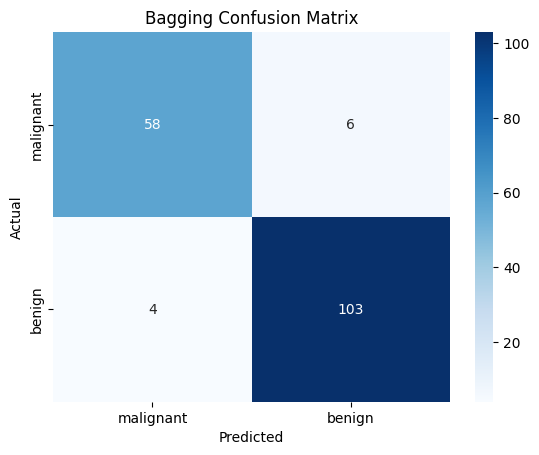


AdaBoost Performance:
Accuracy: 0.9590643274853801
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



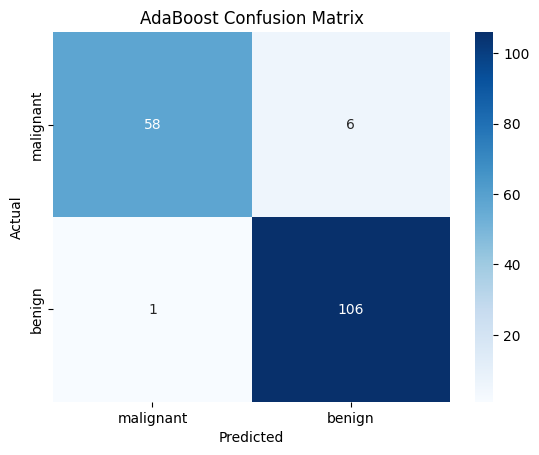


Gradient Boosting Performance:
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        64
      benign       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



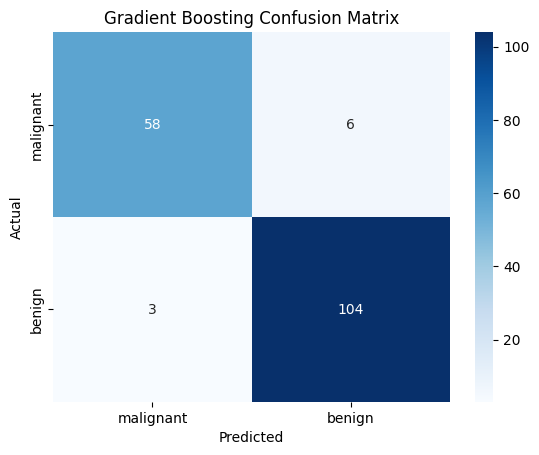


Stacking Performance:
Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



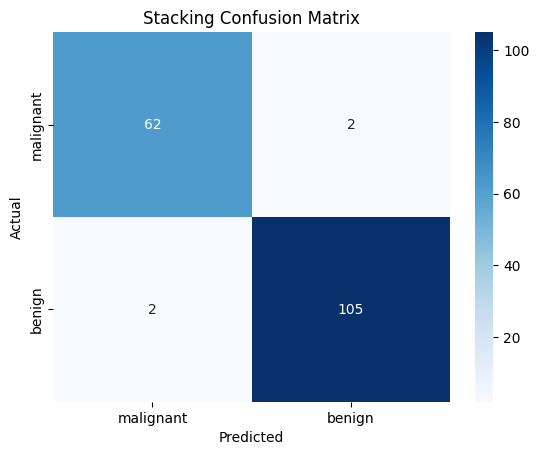

In [9]:
def evaluate_model(name, y_true, y_pred, model=None):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=data.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate each model
evaluate_model("Bagging", y_test, y_pred_bag)
evaluate_model("AdaBoost", y_test, y_pred_ada)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)
evaluate_model("Stacking", y_test, y_pred_stack)

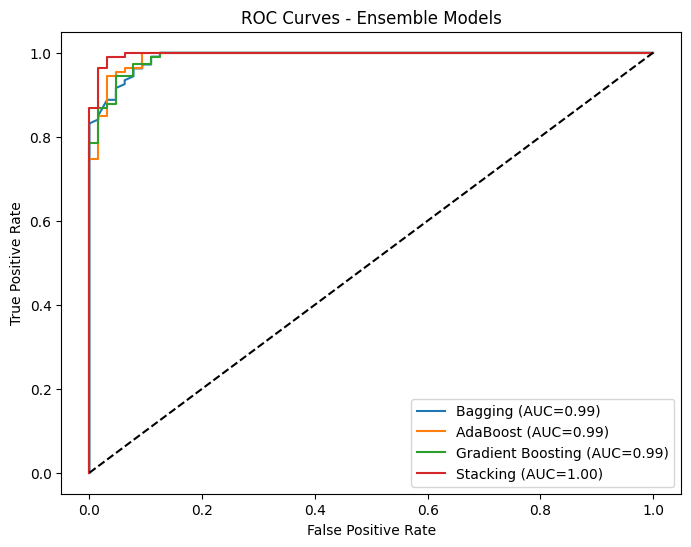

In [10]:
plt.figure(figsize=(8,6))

# Calculate ROC for each model
models = {
    "Bagging": bagging_model,
    "AdaBoost": ada,
    "Gradient Boosting": gb,
    "Stacking": stacking_model
}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Ensemble Models")
plt.legend()
plt.show()

In [12]:
# Bagging with different number of estimators
for n in [10, 50, 100]:
    model = BaggingClassifier(
        estimator=base_tree,   
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Bagging (n_estimators={n}): Accuracy = {acc:.4f}")

# AdaBoost with different learning rates
for lr in [0.01, 0.1, 1.0]:
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),  
        n_estimators=50,
        learning_rate=lr,
        random_state=42
    )
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"AdaBoost (learning_rate={lr}): Accuracy = {acc:.4f}")


Bagging (n_estimators=10): Accuracy = 0.9591
Bagging (n_estimators=50): Accuracy = 0.9415
Bagging (n_estimators=100): Accuracy = 0.9474
AdaBoost (learning_rate=0.01): Accuracy = 0.9181
AdaBoost (learning_rate=0.1): Accuracy = 0.9357
AdaBoost (learning_rate=1.0): Accuracy = 0.9591


In [13]:
print("\n--- Summary ---")
print("Bagging: reduces variance, stable predictions.")
print("Boosting: reduces bias, improves weak learners sequentially.")
print("Stacking: combines diverse models, often best performance.")
print("Trade-offs: Bagging is parallel & faster, Boosting can overfit if too many learners, Stacking is powerful but complex.")


--- Summary ---
Bagging: reduces variance, stable predictions.
Boosting: reduces bias, improves weak learners sequentially.
Stacking: combines diverse models, often best performance.
Trade-offs: Bagging is parallel & faster, Boosting can overfit if too many learners, Stacking is powerful but complex.
